# Doubly Convolutional Neural Networks

Replication of the filter correlation results obtained on AlexNet and VGGNet(19 layers).

In [1]:
import h5py
import numpy as np
import heapq
import matplotlib.pyplot as plt
%matplotlib inline
from src.filters_correlation import avg_max_k_translation_correlation, k_translation_correlation

In [2]:
# Load weights
# AlexNet weights : https://github.com/heuritech/convnets-keras
# http://files.heuritech.com/weights/alexnet_weights.h5
alexnet_weights = './weights/alexnet_weights.h5'
# get first layer filters learned by AlexNet
W = []
with h5py.File(alexnet_weights, 'r') as f:
    W.append(np.array(f['conv_1']['conv_1_W']))
    W.append(np.array(f['conv_2_1']['conv_2_1_W']))
    W.append(np.array(f['conv_2_2']['conv_2_2_W']))
    W.append(np.array(f['conv_3']['conv_3_W']))
    W.append(np.array(f['conv_4_1']['conv_4_1_W']))
    W.append(np.array(f['conv_4_2']['conv_4_2_W']))
    W.append(np.array(f['conv_5_1']['conv_5_1_W']))
    W.append(np.array(f['conv_5_2']['conv_5_2_W']))


In [3]:
def get_most_correlated_filter(n, k, W):
    lst = []
    
    nb_filters, _, _, _ = W.shape
    for i in range(nb_filters):
        k_trans_corr_list = []
        for j in range(nb_filters):
            if i == j:
                continue
            k_trans_corr_list.append((j, k_translation_correlation(k, W[i], W[j])))
        
        n_most_corr = heapq.nlargest(n, k_trans_corr_list, key=lambda x: x[1])
        lst.append(map(lambda x : x[0],n_most_corr))
    
    return lst

In [4]:
three_most_corr = get_most_correlated_filter(3, 3, W[0])

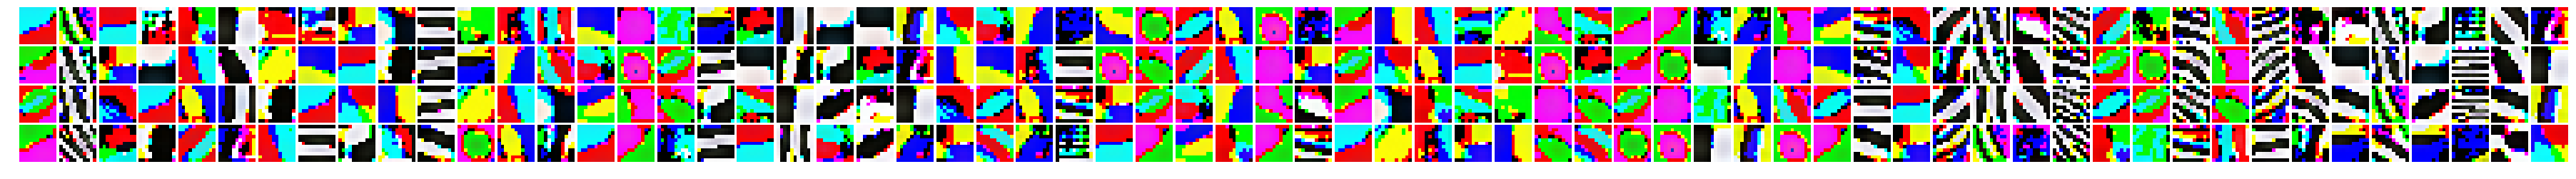

In [14]:
# Display n first filter of layer 1 and there 3 most 3-translation-correlated filters 
n = 64
plt.figure(figsize=(n,4))
plt.subplots_adjust(hspace=0.05, wspace=0.08)

for i in range(4):
    for j in range(n):
        filter_idx = j if i == 0 else three_most_corr[j][i-1]
        filter = np.moveaxis(W[0][filter_idx], [0, 1, 2], [-1, -2, -3])
        plt.subplot(4, n, i*n+j+1)
        plt.axis('off')
        plt.imshow(filter)
plt.show()